**2o examen parcial**

Rosa Isela Amador Rafael

**
Ejercicio 1. (50 puntos)**

Cargue los datos de incidentes viales reportados por C5 (Viales_2022_2024.csv en Github) y realice lo siguiente:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lxml


Cargue los datos de incidentes viales reportados por C5 (Viales_2022_2024.csv en Github) y realice lo siguiente:

In [ ]:
ruta="https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv"
viales=pd.read_csv(ruta, chunksize=10_000)



a) Obtenga un Dataframe con los tipos de incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

In [ ]:
for chunk in pd.read_csv(ruta, chunksize=100_000):
    print(chunk.columns)
    break

Index(['fecha_creacion', 'hora_creacion', 'tipo_incidente_c4', 'incidente_c4',
       'alcaldia_inicio', 'clas_con_f_alarma', 'tipo_entrada',
       'alcaldia_catalogo', 'colonia_catalogo', 'longitud', 'latitud'],
      dtype='object')


In [ ]:
tot = pd.Series([], dtype='int64')

In [ ]:
for piece in viales:
    tot = tot.add(piece['tipo_incidente_c4'].value_counts(), fill_value=0)
    tot = tot.sort_values(ascending=False)

tipo_incidentes=pd.DataFrame(tot,columns=['Frecuencia'])
tipo_incidentes

,Frecuencia
tipo_incidente_c4,
Accidente,150097.0
Lesionado,17356.0
Cadáver,353.0
Detención ciudadana,120.0
Mi Calle,105.0
Sismo,36.0
Mi Taxi,20.0


In [ ]:
tipo_incidentes = tipo_incidentes.head().sort_values(by=['Frecuencia'])

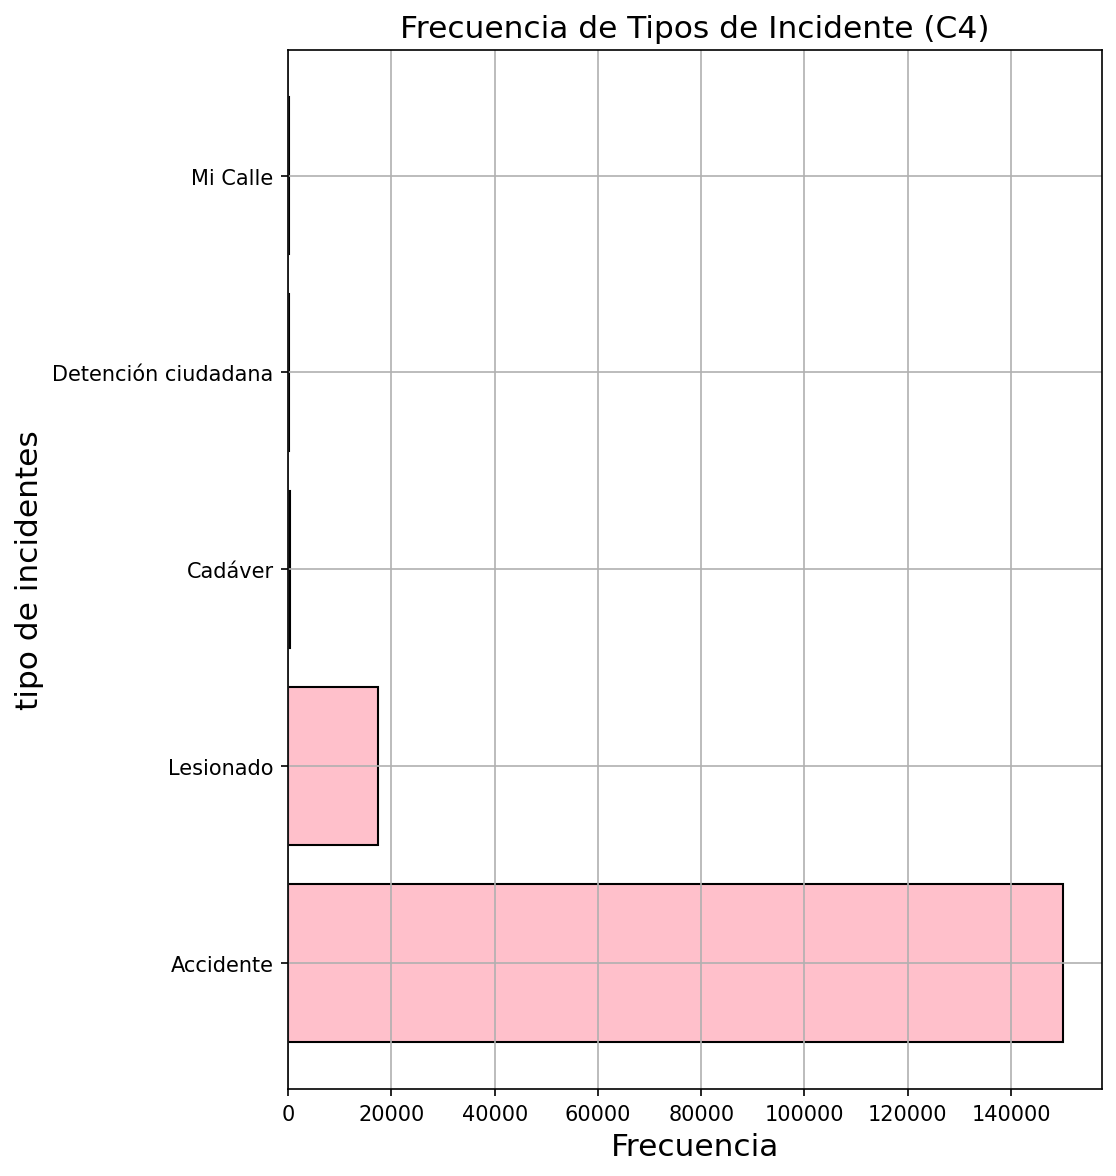

In [ ]:
plt.figure(figsize=(7,9), dpi=150)
plt.barh(tipo_incidentes.index, tipo_incidentes['Frecuencia']
         ,facecolor='pink', edgecolor='black')
plt.title('Frecuencia de Tipos de Incidente (C4)', fontsize = 15)
plt.xlabel('Frecuencia', fontsize = 15)
plt.ylabel('tipo de incidentes', fontsize = 15)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

b) Obtenga un Dataframe con los incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

In [ ]:
incidentes= piece.groupby('incidente_c4').size().reset_index(name='Frecuencias')
incidentes=incidentes.sort_values(by='Frecuencias', ascending=False)
incidentes



,incidente_c4,Frecuencias
4,Choque sin lesionados,3629
2,Choque con lesionados,2458
1,Atropellado,887
7,Motociclista,812
5,Ciclista,100
11,Volcadura,99
9,Persona atrapada / desbarrancada,51
10,Vehículo atrapadovarado,23
3,Choque con prensados,15
0,Accidente automovilístico,8


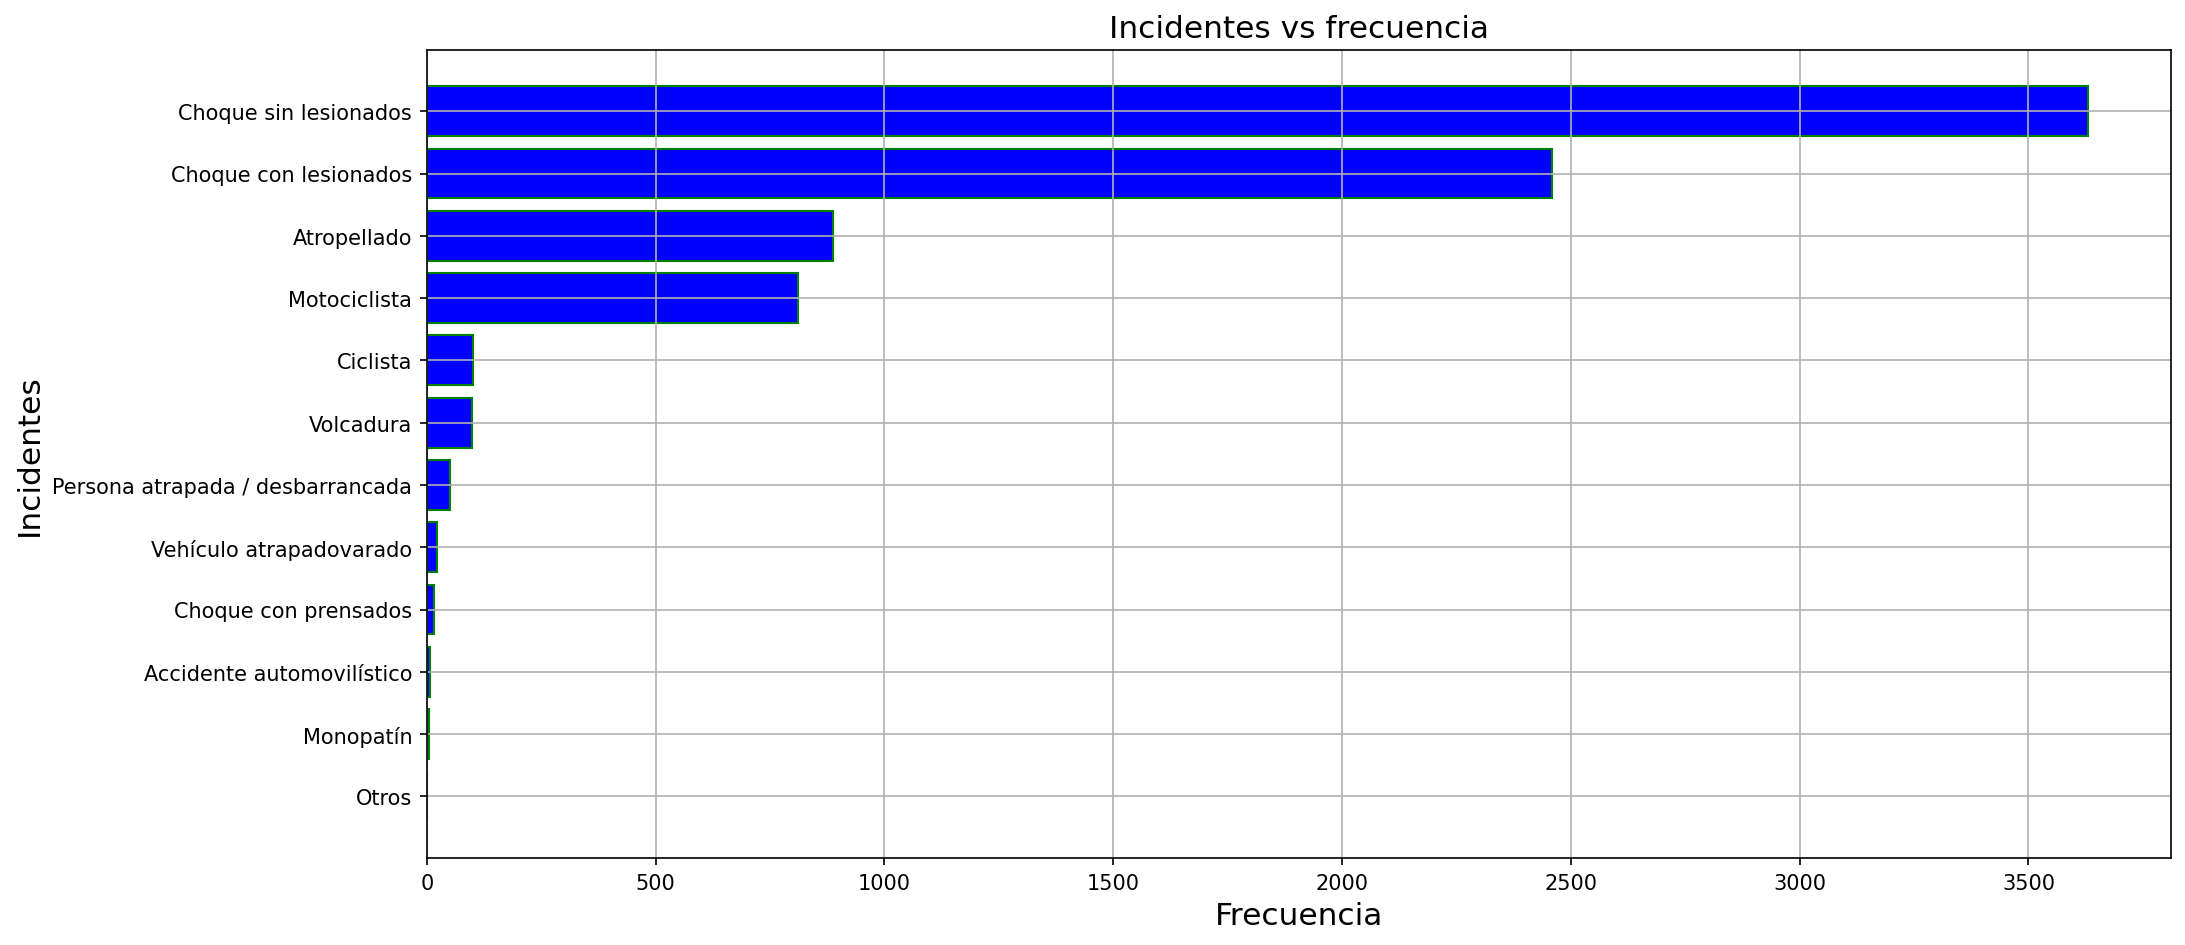

In [ ]:
plt.figure(figsize=(15,7), dpi=150)
plt.barh(incidentes['incidente_c4'], incidentes['Frecuencias']
         ,facecolor='blue', edgecolor='green')
plt.title('Incidentes vs frecuencia', fontsize = 15)
plt.xlabel('Frecuencia', fontsize = 15)
plt.ylabel('Incidentes', fontsize = 15)
plt.gca().invert_yaxis()
plt.grid(True)

c) Obtenga un gráfico de barras que iluste el número de incidentes por alcaldía (columna 'alcaldia_inicio').

In [ ]:
incidentes_a = piece.groupby('alcaldia_inicio').size().reset_index(name='Frecuencias')
incidentes_a= incidentes_a.sort_values(by='Frecuencias', ascending=False)

In [ ]:
incidentes_a

,alcaldia_inicio,Frecuencias
8,IZTAPALAPA,1311
6,GUSTAVO A. MADERO,947
5,CUAUHTEMOC,829
14,VENUSTIANO CARRANZA,610
13,TLALPAN,598
3,COYOACAN,586
2,BENITO JUAREZ,558
0,ALVARO OBREGON,544
10,MIGUEL HIDALGO,480
7,IZTACALCO,373


In [ ]:
conteo = piece.groupby(['alcaldia_inicio','incidente_c4']).size().reset_index(name='Frecuencia')
conteo = conteo.sort_values(by='Frecuencia', ascending=False)

In [ ]:
conteo

,alcaldia_inicio,incidente_c4,Frecuencia
74,IZTAPALAPA,Choque sin lesionados,601
56,GUSTAVO A. MADERO,Choque sin lesionados,419
72,IZTAPALAPA,Choque con lesionados,399
46,CUAUHTEMOC,Choque sin lesionados,318
54,GUSTAVO A. MADERO,Choque con lesionados,299
...,...,...,...
125,VENUSTIANO CARRANZA,Persona atrapada / desbarrancada,1
123,VENUSTIANO CARRANZA,Monopatín,1
134,XOCHIMILCO,Otros,1
135,XOCHIMILCO,Persona atrapada / desbarrancada,1


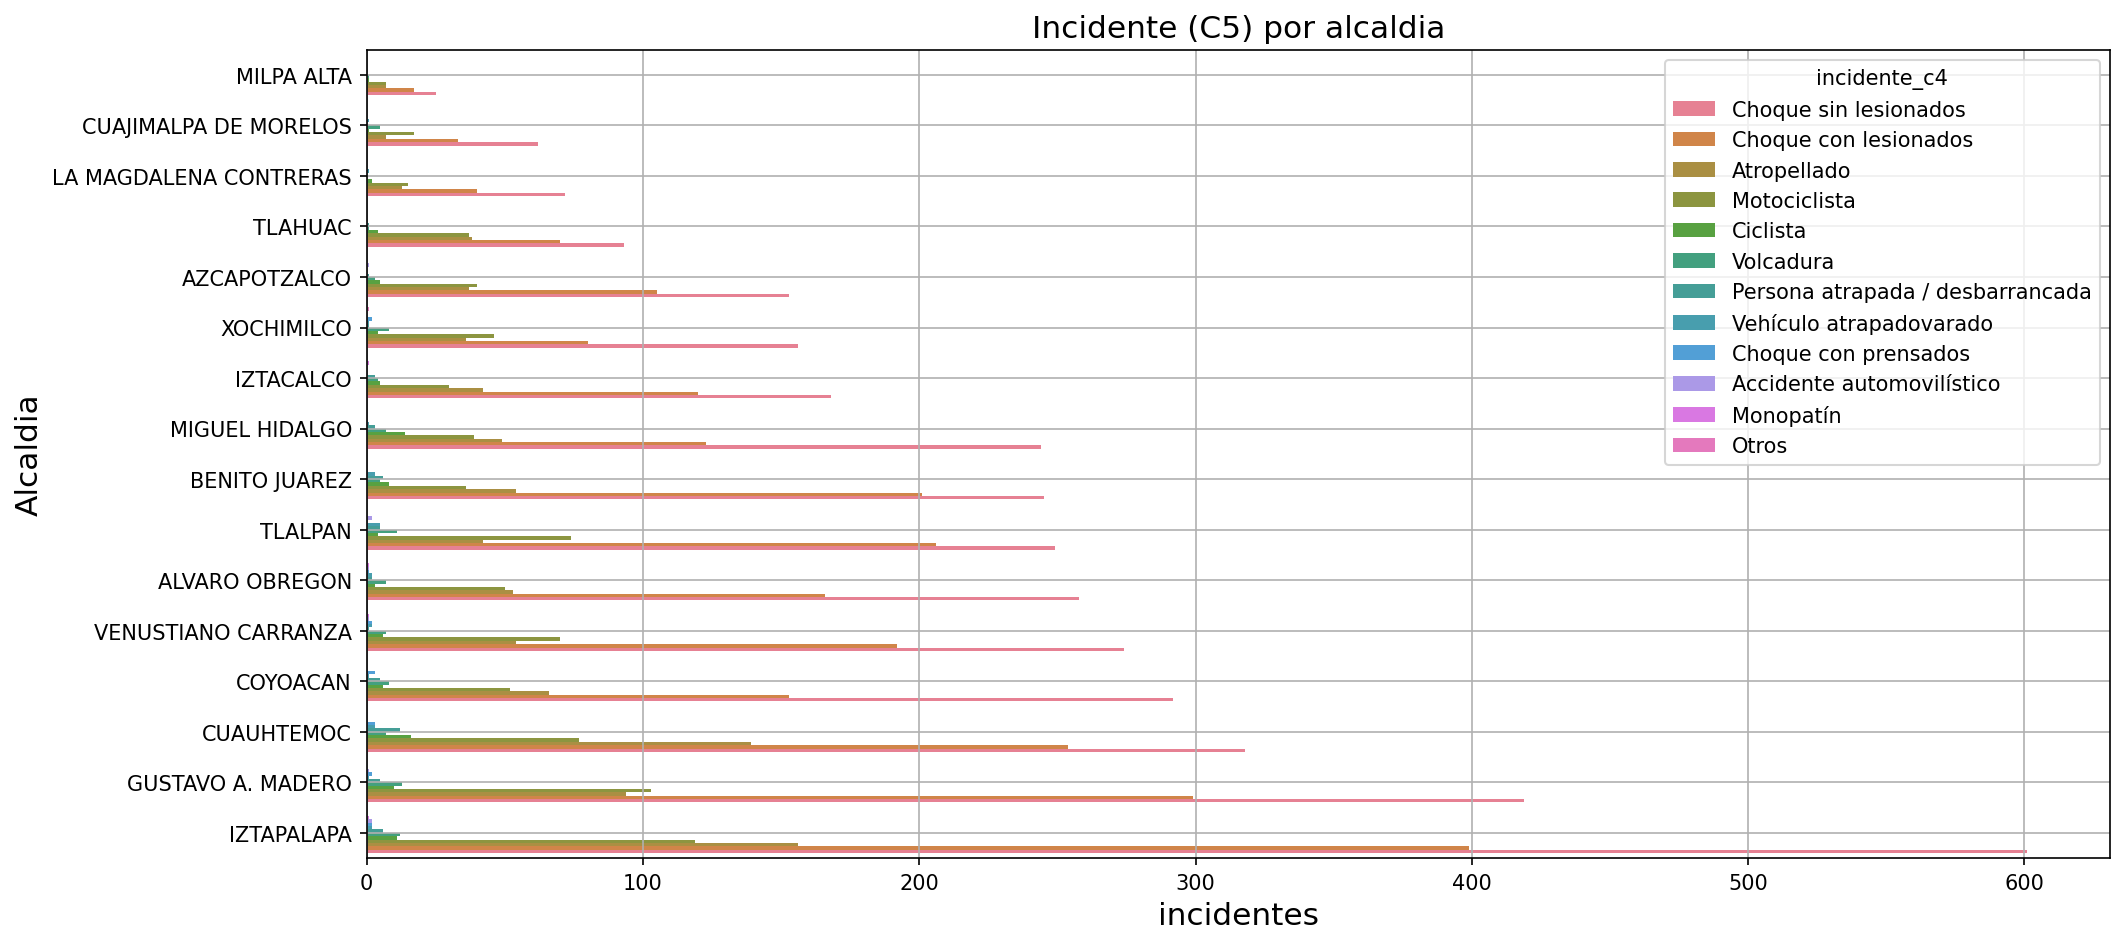

In [ ]:
plt.figure(figsize=(15,7), dpi=150)
sns.barplot(data=conteo, y='alcaldia_inicio', x='Frecuencia',hue='incidente_c4' )

plt.title('Incidente (C5) por alcaldia', fontsize = 15)
plt.xlabel('incidentes', fontsize = 15)
plt.ylabel('Alcaldia', fontsize = 15)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

d) Obtenga una serie temporal con el número de atropellados por semana y grafique la serie.

In [ ]:
ruta="https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv"
viales=pd.read_csv(ruta, chunksize=10_000)
df = pd.concat(viales)

In [ ]:
viales_atropellados = df[df['incidente_c4'] == 'Atropellado']

In [ ]:
viales_atropellados['fecha_hora'] = pd.to_datetime(
    viales_atropellados['fecha_creacion'] + ' ' + viales_atropellados['hora_creacion'],
    format='%Y-%m-%d %H:%M:%S'
)

/tmp/ipython-input-283-3130061405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viales_atropellados['fecha_hora'] = pd.to_datetime(


In [ ]:
viales_atropellados['semana'] = viales_atropellados['fecha_hora'].dt.to_period('W').apply(lambda r: r.start_time)



/tmp/ipython-input-284-2834212834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viales_atropellados['semana'] = viales_atropellados['fecha_hora'].dt.to_period('W').apply(lambda r: r.start_time)


In [ ]:
serie_atropellados = viales_atropellados.groupby('semana').size()

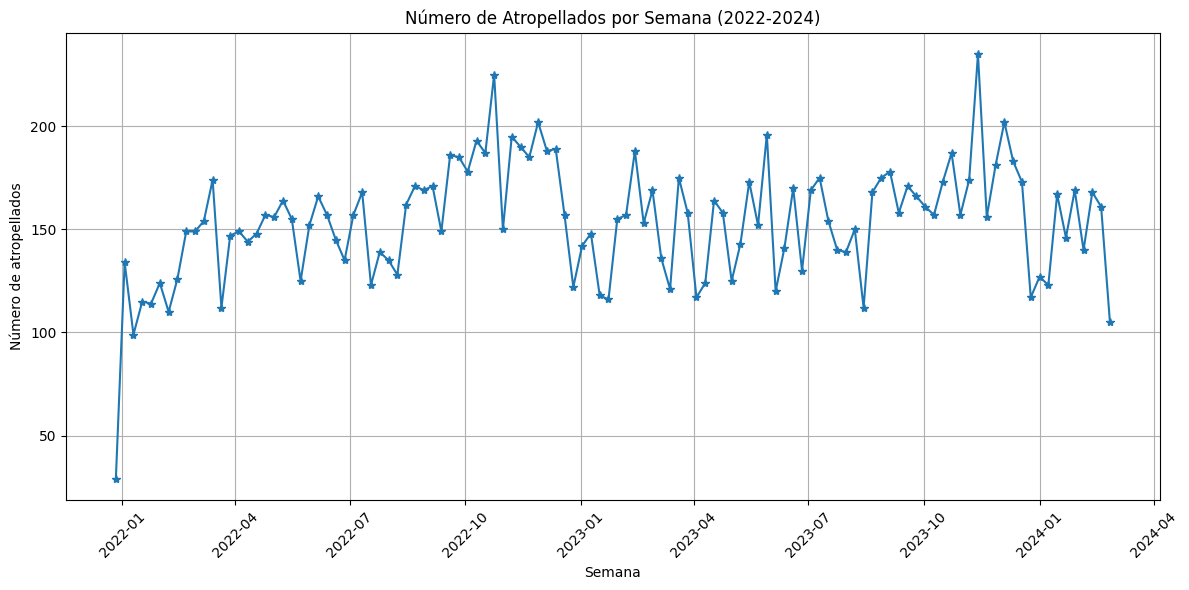

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(serie_atropellados.index, serie_atropellados.values, marker='*')
plt.title('Número de Atropellados por Semana (2022-2024)')
plt.xlabel('Semana')
plt.ylabel('Número de atropellados')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

e) Obtenga un mapa de calor (HeatMap) que muestre la ubicación geográfica de los reportes de personas atropelladas, utilizando las coordenadas de latitud y longitud asociadas a cada incidente.

In [ ]:
import folium
from folium.plugins import HeatMap
import folium

In [ ]:
from folium.plugins import HeatMap
import folium


m = folium.Map(location=[19.4, -99.1],
               zoom_start=11, tiles="Cartodb Positron")

HeatMap(viales_atropellados[["latitud", "longitud"]].dropna(), radius=7,
        blur=1, min_opacity=0.2).add_to(m)
m

**Ejercicio 2. (50 puntos)**

Extraiga las tabla de "Terremotos de mayor magnitud" del siguiente enlace:

https://es.wikipedia.org/wiki/Anexo:Terremotos_de_mayor_magnitud

y realice lo siguiente:

a) Obtenga el siguiente Dataframe.

In [ ]:
ruta="https://es.wikipedia.org/wiki/Anexo:Terremotos_de_mayor_magnitud"
terre=pd.read_html(ruta)
terre

[                                                       Visualiza un mapa con todas las coordenadas
   Sitúa todas las coordenadas utilizando OpenStreetMap Sitúa hasta 200 coordenadas utilizando Bing
 0       Exporta todas las coordenadas en formato KML                                              
 1    Exporta todas las coordenadas en formato GeoRSS                                              
 2       Exporta todas las coordenadas en formato GPX                                              
 3  Sitúa en el mapa todas las coordenadas microfo...                                              ,
     N.º                 Fecha y hora UTC          Magnitud  \
 0     1        22 de mayo de 1960, 15:11    9,5 MW[2]​[3]​   
 1     2   26 de diciembre de 2004, 00:58        9,3 MW[5]​   
 2     2       28 de marzo de 1964, 03:36    9,2 MW[3]​[7]​   
 3     4       11 de marzo de 2011, 05:46        9,1 MW[9]​   
 4     4    4 de noviembre de 1952, 16:58  9,0 MW[11]​[12]​   
 5     4      13 de a

In [ ]:
len(terre)

3

In [ ]:
df_datos=terre[1]


In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:
df_datos.drop(26, inplace=True)

In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:

df_datos['Fecha y hora UTC'] = df_datos['Fecha y hora UTC'].fillna('00:00')

In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:

df_datos[['fecha_parte', 'hora_parte']] = df_datos['Fecha y hora UTC'].str.split(',', n=1, expand=True)


In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:

df_datos['hora_parte'] = df_datos['hora_parte'].fillna('00:00')
df_datos['hora_parte'] = df_datos['hora_parte'].str.strip()
df_datos['hora_parte'] = df_datos['hora_parte'].replace('', '00:00')


In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:

df_datos['Año'] = df_datos['fecha_parte'].str.extract(r'(\d{4})').astype(int)

In [ ]:
df_datos


,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:
meses = {'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
         'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12}


In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:
df_datos['Mes_nombre'] = df_datos['fecha_parte'].str.extract(r'de (\w+) de')
df_datos['Mes'] = df_datos['Mes_nombre'].map(meses)

In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:
df_datos['Día'] = df_datos['fecha_parte'].str.extract(r'(\d{1,2})').astype(int)

In [ ]:
df_datos['Magnitud_limpia'] = df_datos['Magnitud'] \
    .str.replace(r'\[.*?\]', '', regex=True) \
    .str.replace(r'[^\d,\.]', '', regex=True) \
    .str.replace(',', '.') \
    .astype(float)


In [ ]:
df_datos

,N.º,Fecha y hora UTC,Magnitud,Nombre,País,Lugar y coordenadas,Muertes,fecha_parte,hora_parte,Año,Mes_nombre,Mes,Día,Magnitud_limpia
0,1,"22 de mayo de 1960, 15:11","9,5 MW[2]​[3]​",Terremoto de Valdivia de 1960[4]​,Chile,"Valdivia, Región de los Ríos38°14′24″S 73°3′0″...",1655 a 2000,22 de mayo de 1960,15:11,1960,mayo,5,22,9.5
1,2,"26 de diciembre de 2004, 00:58","9,3 MW[5]​",Terremoto del océano Índico de 2004[6]​,Indonesia,Frente al norte de la isla de Sumatra,230 270,26 de diciembre de 2004,00:58,2004,diciembre,12,26,9.3
2,2,"28 de marzo de 1964, 03:36","9,2 MW[3]​[7]​",Terremoto de Alaska de 1964[7]​[8]​,Estados Unidos,"Anchorage, Alaska 61°N 148°O﻿ / ﻿61, -148",128,28 de marzo de 1964,03:36,1964,marzo,3,28,9.2
3,4,"11 de marzo de 2011, 05:46","9,1 MW[9]​",Terremoto y maremoto de Japón de 2011[10]​,Japón,"Costa Este de la Región de Tōhoku, Honshū 38°1...",15 897,11 de marzo de 2011,05:46,2011,marzo,3,11,9.1
4,4,"4 de noviembre de 1952, 16:58","9,0 MW[11]​[12]​",Terremoto de Kamchatka de 1952[11]​[13]​[14]​,Unión Soviética (actual Rusia),Península de Kamchatka 52°48′N 159°30′E﻿ / ﻿52...,2366,4 de noviembre de 1952,16:58,1952,noviembre,11,4,9.0
5,4,"13 de agosto de 1868, 21:30","9,0 MW[15]​",Terremoto de Arica de 1868[15]​[16]​,Perú (actual Chile),"Arica 18°36′S 71°0′O﻿ / ﻿-18.600, -71.000",693,13 de agosto de 1868,21:30,1868,agosto,8,13,9.0
6,4,"28 de octubre de 1746, 22:30","9,0 MW",Terremoto de Lima de 1746,"Virreinato del Perú, parte del Imperio español...",Lima y Callao 11°21′00″S 77°16′48″O﻿ / ﻿-11.35...,15 000 a 20 000,28 de octubre de 1746,22:30,1746,octubre,10,28,9.0
7,4,"26 de enero de 1700, 21:30","9,0 MW",Terremoto de Cascadia de 1700,"Noroeste del Pacífico, parte del Imperio britá...","California, Oregón, Washington y Columbia Brit...",Sin datos,26 de enero de 1700,21:30,1700,enero,1,26,9.0
8,9,"27 de febrero de 2010, 03:34","8,8 MW",Terremoto de Chile de 2010[17]​[18]​[19]​[20]​,Chile,"Cobquecura, Región del Biobío (actual Ñuble) 3...",525,27 de febrero de 2010,03:34,2010,febrero,2,27,8.8
9,9,"31 de enero de 1906, 15:36","8,8 MW[21]​",Terremoto de Ecuador y Colombia de 1906[22]​,Ecuador Colombia,Frente a las costas de Esmeraldas 1°0′N 81°30′...,1500,31 de enero de 1906,15:36,1906,enero,1,31,8.8


In [ ]:
df_final = df_datos[['Año', 'Mes', 'Día', 'hora_parte', 'Magnitud_limpia', 'Muertes', 'País']]
df_final.columns = ['Año', 'Mes', 'Día', 'Hora', 'Magnitud', 'Muertes', 'País']


In [ ]:
df_final

,Año,Mes,Día,Hora,Magnitud,Muertes,País
0,1960,5,22,15:11,9.5,1655 a 2000,Chile
1,2004,12,26,00:58,9.3,230 270,Indonesia
2,1964,3,28,03:36,9.2,128,Estados Unidos
3,2011,3,11,05:46,9.1,15 897,Japón
4,1952,11,4,16:58,9.0,2366,Unión Soviética (actual Rusia)
5,1868,8,13,21:30,9.0,693,Perú (actual Chile)
6,1746,10,28,22:30,9.0,15 000 a 20 000,"Virreinato del Perú, parte del Imperio español..."
7,1700,1,26,21:30,9.0,Sin datos,"Noroeste del Pacífico, parte del Imperio britá..."
8,2010,2,27,03:34,8.8,525,Chile
9,1906,1,31,15:36,8.8,1500,Ecuador Colombia


b) Obtenga un gráfico de barras que ilustre el año del terremoto y su magnitud.

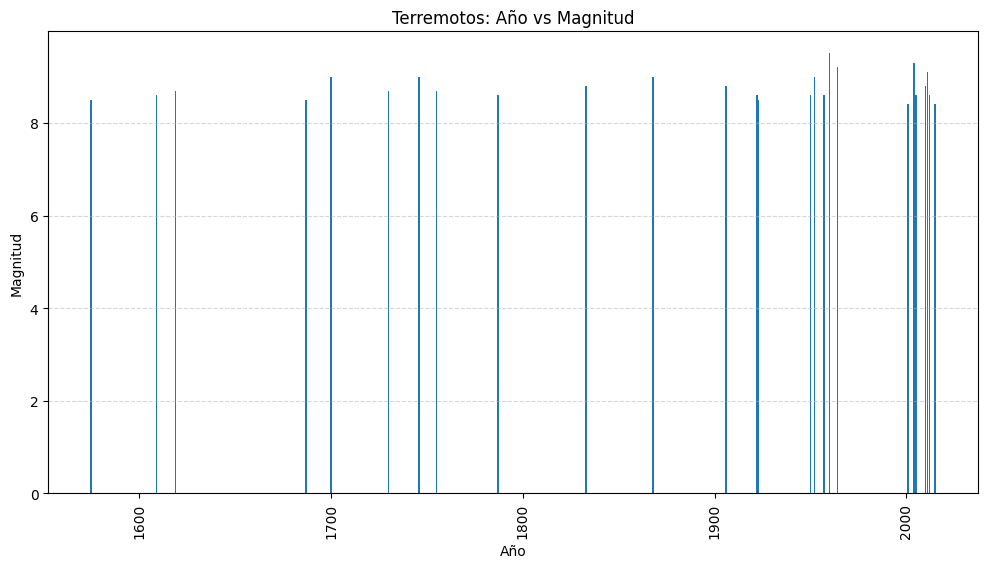

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df_final['Año'], df_final['Magnitud'])
plt.xlabel('Año')
plt.ylabel('Magnitud')
plt.title('Terremotos: Año vs Magnitud')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



c) ¿Cuándo y dónde ocurrió el terremoto de mayor magnitud en la historia?

In [ ]:
idx_max = df_final['Magnitud'].idxmax()
terremoto_max = df_final.loc[idx_max]

print(f"El terremoto de mayor magnitud fue en el año {terremoto_max['Año']}, en {df_datos.loc[idx_max, 'Lugar y coordenadas']}.")
print(f"Magnitud: {terremoto_max['Magnitud']} - Hora: {terremoto_max['Hora']}")


El terremoto de mayor magnitud fue en el año 1960, en Valdivia, Región de los Ríos38°14′24″S 73°3′0″O﻿ / ﻿-38.24000, -73.05000.
Magnitud: 9.5 - Hora: 15:11
